In [88]:
import pandas as pd
from pathlib import Path
import hvplot.pandas 
import matplotlib.pyplot as plt 

customer_segmentation_data = "customer_segmentation_data.csv"

cs_df = pd.read_csv(customer_segmentation_data)

cs_df = pd.DataFrame(cs_df)

cs_df


,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,44809,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,120850,policy3,01-01-2019,Mobile App,policy1,586401,4404,Family,In-Person Meeting,Phone,Afternoon,German,Segment5
53499,65485,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,122309,policy5,5/18/2021,Mobile App,policy4,637733,1285,Group,Text,Mail,Afternoon,German,Segment1
53500,26213,25,Male,Divorced,Doctorate,Assam,Teacher,49258,policy2,11/27/2018,In-Person,policy1,631057,4407,Individual,Text,Text,Weekends,French,Segment4
53501,63136,42,Male,Married,Doctorate,Andhra Pradesh,Artist,66301,policy4,06-04-2021,In-Person,policy1,730385,4482,Business,Mail,Phone,Morning,French,Segment5


# Relationship Comparison: Marital Status vs. Policy type

In [89]:
print(cs_df.columns)

Index(['Customer ID', 'Age', 'Gender', 'Marital Status', 'Education Level',
       'Geographic Information', 'Occupation', 'Income Level',
       'Behavioral Data', 'Purchase History',
       'Interactions with Customer Service', 'Insurance Products Owned',
       'Coverage Amount', 'Premium Amount', 'Policy Type',
       'Customer Preferences', 'Preferred Communication Channel',
       'Preferred Contact Time', 'Preferred Language', 'Segmentation Group'],
      dtype='object')


In [90]:
policy_by_marital = cs_df.groupby(["Marital Status", "Policy Type"]).size().reset_index(name='Totals')
policy_by_marital

,Marital Status,Policy Type,Totals
0,Divorced,Business,3352
1,Divorced,Family,2918
2,Divorced,Group,4651
3,Divorced,Individual,2230
4,Married,Business,3536
5,Married,Family,3071
6,Married,Group,4558
7,Married,Individual,2054
8,Separated,Business,2482
9,Separated,Family,2095


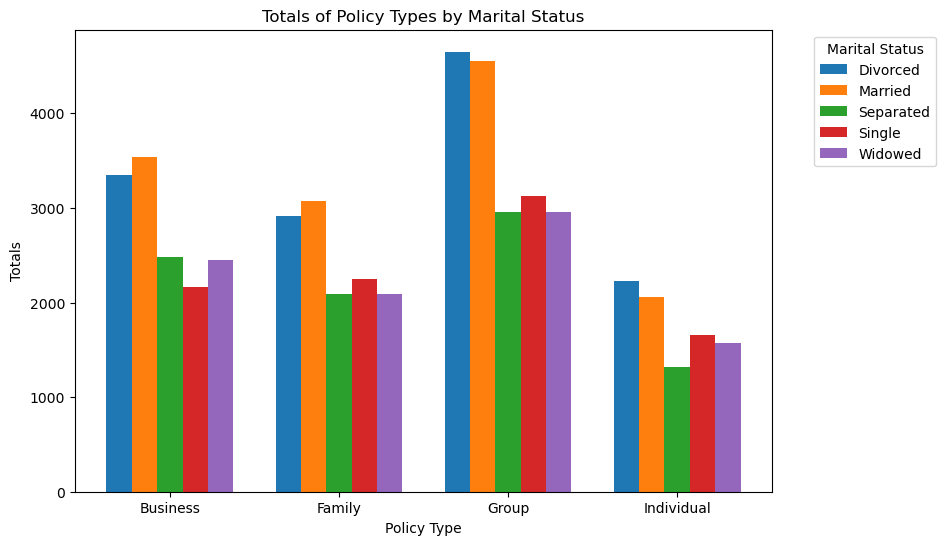

In [91]:
import matplotlib.pyplot as plt

marital_status = ["Divorced", "Married", "Separated", "Single", "Widowed"]
policy_types = ["Business", "Family", "Group", "Individual"]
totals = [
    [3352, 2918, 4651, 2230],
    [3536, 3071, 4558, 2054],
    [2482, 2095, 2962, 1322],
    [2166, 2251, 3122, 1656],
    [2450, 2089, 2962, 1576]
]

fig, ax = plt.subplots(figsize=(9, 6))
bar_width = 0.15

for i, (mstatus, data) in enumerate(zip(marital_status, totals)):
    x = range(len(data))
    ax.bar([pos + i * bar_width for pos in x], data, width=bar_width, label=mstatus)

ax.set_xticks([pos + bar_width * 2 for pos in range(len(policy_types))])
ax.set_xticklabels(policy_types)
ax.set_xlabel('Policy Type')
ax.set_ylabel('Totals')
ax.set_title('Totals of Policy Types by Marital Status')
ax.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



# Relationship Comparison: Insurace Coverage vs. Income Level

In [92]:
print(cs_df.columns)

Index(['Customer ID', 'Age', 'Gender', 'Marital Status', 'Education Level',
       'Geographic Information', 'Occupation', 'Income Level',
       'Behavioral Data', 'Purchase History',
       'Interactions with Customer Service', 'Insurance Products Owned',
       'Coverage Amount', 'Premium Amount', 'Policy Type',
       'Customer Preferences', 'Preferred Communication Channel',
       'Preferred Contact Time', 'Preferred Language', 'Segmentation Group'],
      dtype='object')


In [93]:
cs_df.drop(columns=['Customer ID'], inplace=True)

In [94]:
correlation = cs_df['Coverage Amount'].corr(cs_df['Income Level'])
print(f"The correlation between Insurance Coverage and Income Level is: {correlation}")

The correlation between Insurance Coverage and Income Level is: -0.01802429895116384


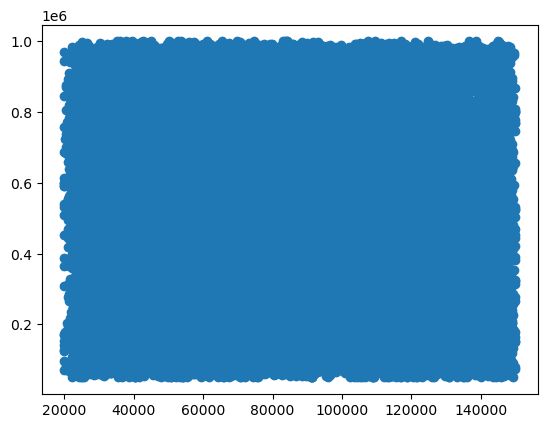

In [95]:
scatter_plot = plt.scatter(cs_df['Income Level'], cs_df['Coverage Amount'])
scatter_plot

In [106]:
income_bins = [20000, 51000, 80000, 116000, 150000]
labels = ["$20000-51000", "$51000-80000", "$80000-116000","$116000-150000"]

In [107]:
cs_df['Income Level']=pd.cut(cs_df['Income Level'],bins=income_bins,labels=labels,include_lowest=True)
cs_df

,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,$51000-80000,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,26,Male,Widowed,Doctorate,Goa,Manager,$51000-80000,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,$51000-80000,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,$51000-80000,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,$20000-51000,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,$116000-150000,policy3,01-01-2019,Mobile App,policy1,586401,4404,Family,In-Person Meeting,Phone,Afternoon,German,Segment5
53499,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,$116000-150000,policy5,5/18/2021,Mobile App,policy4,637733,1285,Group,Text,Mail,Afternoon,German,Segment1
53500,25,Male,Divorced,Doctorate,Assam,Teacher,$20000-51000,policy2,11/27/2018,In-Person,policy1,631057,4407,Individual,Text,Text,Weekends,French,Segment4
53501,42,Male,Married,Doctorate,Andhra Pradesh,Artist,$51000-80000,policy4,06-04-2021,In-Person,policy1,730385,4482,Business,Mail,Phone,Morning,French,Segment5


In [111]:
coverage_bins = [200000, 480000, 740000, 1000000]
labels2 = ["$200000-480000", "$480000-7400000", "$7400000-1000000"]

In [112]:
cs_df['Coverage Amount']=pd.cut(cs_df['Coverage Amount'],bins=coverage_bins,labels=labels2,include_lowest=True)
cs_df

,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,$51000-80000,policy5,04-10-2018,Phone,policy2,$200000-480000,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,26,Male,Widowed,Doctorate,Goa,Manager,$51000-80000,policy5,11-06-2018,Chat,policy1,$7400000-1000000,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,$51000-80000,policy5,06-05-2021,Email,policy3,$7400000-1000000,4413,Group,Email,Mail,Evening,German,Segment3
3,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,$51000-80000,policy5,09-02-2018,Chat,policy2,$7400000-1000000,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,$20000-51000,policy1,09-10-2018,Chat,policy4,$200000-480000,1276,Family,Email,Text,Weekends,English,Segment2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,$116000-150000,policy3,01-01-2019,Mobile App,policy1,$480000-7400000,4404,Family,In-Person Meeting,Phone,Afternoon,German,Segment5
53499,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,$116000-150000,policy5,5/18/2021,Mobile App,policy4,$480000-7400000,1285,Group,Text,Mail,Afternoon,German,Segment1
53500,25,Male,Divorced,Doctorate,Assam,Teacher,$20000-51000,policy2,11/27/2018,In-Person,policy1,$480000-7400000,4407,Individual,Text,Text,Weekends,French,Segment4
53501,42,Male,Married,Doctorate,Andhra Pradesh,Artist,$51000-80000,policy4,06-04-2021,In-Person,policy1,$480000-7400000,4482,Business,Mail,Phone,Morning,French,Segment5


In [52]:
income_by_education = cs_df.groupby(["Education Level", "Income Level"]).size().reset_index(name='Totals')
income_by_education

/var/folders/26/ks0nn6ld0_3fn_thb3prhmgm0000gp/T/ipykernel_27539/2807309303.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_by_education = cs_df.groupby(["Education Level", "Income Level"]).size().reset_index(name='Totals')


,Education Level,Income Level,Totals
0,Associate Degree,$20000-51000,2900
1,Associate Degree,$51000-80000,3108
2,Associate Degree,$80000-116000,3105
3,Associate Degree,$116000-150000,3100
4,Bachelor's Degree,$20000-51000,2353
5,Bachelor's Degree,$51000-80000,2342
6,Bachelor's Degree,$80000-116000,2170
7,Bachelor's Degree,$116000-150000,2349
8,Doctorate,$20000-51000,3031
9,Doctorate,$51000-80000,3147


In [113]:
income_by_coverage = cs_df.groupby(["Coverage Amount", "Income Level"]).size().reset_index(name='Totals')
income_by_coverage

/var/folders/26/ks0nn6ld0_3fn_thb3prhmgm0000gp/T/ipykernel_27539/2843952645.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_by_coverage = cs_df.groupby(["Coverage Amount", "Income Level"]).size().reset_index(name='Totals')


,Coverage Amount,Income Level,Totals
0,$200000-480000,$20000-51000,3956
1,$200000-480000,$51000-80000,4111
2,$200000-480000,$80000-116000,4121
3,$200000-480000,$116000-150000,4202
4,$480000-7400000,$20000-51000,3377
5,$480000-7400000,$51000-80000,3305
6,$480000-7400000,$80000-116000,3368
7,$480000-7400000,$116000-150000,3240
8,$7400000-1000000,$20000-51000,3225
9,$7400000-1000000,$51000-80000,3540


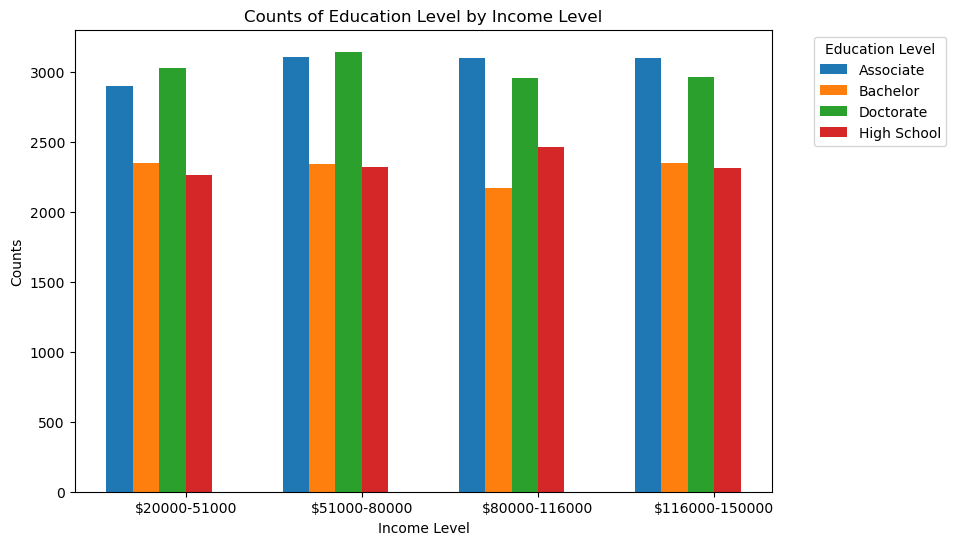

In [70]:

education = ["Associate", "Bachelor", "Doctorate", "High School", "Master"]
income_bin = ["$20000-51000", "$51000-80000", "$80000-116000", "$116000-150000"]
counts = [
    [2900, 3108, 3105, 3100],
    [2353,2342,2170,2349],
    [3031,3147, 2961, 2964],
    [2263,2326,2464, 2313]
]

fig, ax = plt.subplots(figsize=(9, 6))
bar_width = 0.15

for i, (educate, data2) in enumerate(zip(education, counts)):
    x = range(len(data2))
    ax.bar([pos + i * bar_width for pos in x], data2, width=bar_width, label=educate)

ax.set_xticks([pos + bar_width * 2.5 for pos in range(len(income_bin))])
ax.set_xticklabels(income_bin)
ax.set_xlabel('Income Level')
ax.set_ylabel('Counts')
ax.set_title('Counts of Education Level by Income Level')
ax.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

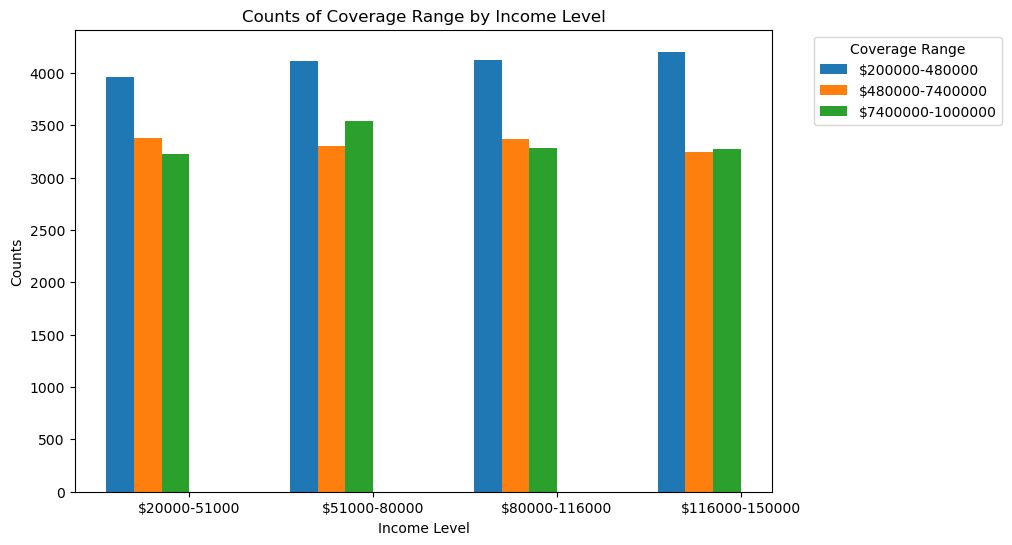

In [114]:

coverage = ["$200000-480000", "$480000-7400000", "$7400000-1000000"]
income_bin = ["$20000-51000", "$51000-80000", "$80000-116000", "$116000-150000"]
counts = [
    [3956, 4111,4121,4202],
    [3377,3305,3368,3240],
    [3225,3540,3287,3272]
]

fig, ax = plt.subplots(figsize=(9, 6))
bar_width = 0.15

for i, (coverage, data2) in enumerate(zip(coverage, counts)):
    x = range(len(data2))
    ax.bar([pos + i * bar_width for pos in x], data2, width=bar_width, label=coverage)

ax.set_xticks([pos + bar_width * 2.5 for pos in range(len(income_bin))])
ax.set_xticklabels(income_bin)
ax.set_xlabel('Income Level')
ax.set_ylabel('Counts')
ax.set_title('Counts of Coverage Range by Income Level')
ax.legend(title='Coverage Range', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()